<a href="https://colab.research.google.com/github/SerArthurDayne17/Object-Recognition/blob/main/Object_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle competitions download -c cifar-10

 99% 711M/715M [00:23<00:00, 38.6MB/s]
100% 715M/715M [00:23<00:00, 32.2MB/s]


In [6]:
!ls

cifar-10.zip  kaggle.json  sample_data


In [7]:
# extracting the compressed Dataset
from zipfile import ZipFile
dataset = '/content/cifar-10.zip'

with ZipFile(dataset,'r') as zipi:
  zipi.extractall()
  print('Dataset is extracted')

Dataset is extracted


In [8]:
!ls

cifar-10.zip  sample_data	    test.7z   trainLabels.csv
kaggle.json   sampleSubmission.csv  train.7z


In [9]:
!pip install py7zr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 85.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.3/399.3 kB 43.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.8/138.8 kB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.8/49.8 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 54.3 MB/s eta 0:00:00


In [10]:
import py7zr
trainset = '/content/train.7z'

archive_ =  py7zr.SevenZipFile(trainset, mode='r')
archive_.extractall()
archive_.close()

In [13]:
!ls

cifar-10.zip  sample_data	    test.7z  train.7z
kaggle.json   sampleSubmission.csv  train    trainLabels.csv


In [12]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

In [14]:
filenames = os.listdir('/content/train')

In [16]:
type(filenames)

list

In [17]:
print(filenames[0:5])
print(filenames[-5:])

['2122.png', '28729.png', '13164.png', '5241.png', '22055.png']
['27614.png', '40987.png', '44615.png', '18065.png', '18428.png']


In [18]:
labels_df = pd.read_csv('/content/trainLabels.csv')

In [19]:
labels_df.shape

(50000, 2)

In [21]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [23]:
labels_df.tail(10)

,id,label
49990,49991,deer
49991,49992,bird
49992,49993,airplane
49993,49994,automobile
49994,49995,airplane
49995,49996,bird
49996,49997,frog
49997,49998,truck
49998,49999,automobile
49999,50000,automobile


In [24]:
labels_df[labels_df['id'] == 2122]

,id,label
2121,2122,bird


In [25]:
labels_df['label'].value_counts()

frog          5000
truck         5000
deer          5000
automobile    5000
bird          5000
horse         5000
ship          5000
cat           5000
dog           5000
airplane      5000
Name: label, dtype: int64

In [26]:
labels_df['label']

0              frog
1             truck
2             truck
3              deer
4        automobile
            ...    
49995          bird
49996          frog
49997         truck
49998    automobile
49999    automobile
Name: label, Length: 50000, dtype: object

In [28]:
labels_dictionary = {'airplane':0, 'automobile':1, 'bird':2, 'cat':3, 'deer':4, 'dog':5, 'frog':6, 'horse':7, 'ship':8, 'truck':9}

labels = [labels_dictionary[i] for i in labels_df['label']]

In [29]:
print(labels[0:5])
print(labels[-5:])

[6, 9, 9, 4, 1]
[2, 6, 9, 1, 1]


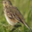

In [30]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/train/2122.png')
cv2_imshow(img)

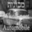

In [32]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/train/48656.png')
cv2_imshow(img)

In [33]:
labels_df[labels_df['id'] == 48656]

,id,label
48655,48656,automobile


In [34]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [35]:
id_list = list(labels_df['id'])

In [36]:
print(id_list[0:5])
print(id_list[-5:])

[1, 2, 3, 4, 5]
[49996, 49997, 49998, 49999, 50000]


**Processing the Images**

In [37]:
# numpy array conversion

train_data_folder = '/content/train/'

data = []

for id in id_list:

  image = Image.open(train_data_folder + str(id) + '.png')
  image = np.array(image)
  data.append(image)

In [38]:
type(data[0])

numpy.ndarray

In [39]:
data[0].shape

(32, 32, 3)

In [40]:
data[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]